# Análise exploratória de dados

In [8]:
import pandas as pd

In [2]:
from IPython.display import display, Markdown

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
from IPython.display import Image

In [6]:
import seaborn as sns

colors = ["#1f77b4", "#2ca02c", "#ff7f0e"]

# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

In [7]:
import warnings

## 1. Leitura do Conjunto de Dados

In [20]:
df = pd.read_csv('../data/raw/sleep_efficiency.csv')
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


## 2. Descrição do Conjunto de Dados

In [14]:
from IPython.display import display, HTML

display(HTML("""
<div style="text-align: center;">
    <img src="https://cdn-icons-png.flaticon.com/512/4419/4419495.png" alt="Pessoa Dormindo" style="width: 50%;">
</div>
"""))

O conjunto de dados, retirado da plataforma Kaggle, contém informações sobre os padrões de sono de indivíduos, identificados por um "ID do Sujeito" único. Inclui dados sobre idade, gênero, hora de dormir, hora de acordar, duração do sono, eficiência do sono, porcentagens de sono REM, profundo e leve, número de despertares, consumo de cafeína e álcool antes de dormir, status de fumante e frequência de exercícios.
A variável dependente é a eficiência do sono **(Sleep efficiency)**. As variáveis preditoras, que podem impactar a eficiência do sono, são **ID**, **age**, **gender**, **Bedtime**, **Wakeup time**, **Sleep duration**, **REM sleep percentage**, **Deep sleep percentage**, **Light sleep percentage**, **Awakenings**, **Caffeine consumption**, **Alcohol consumption**, **Smoking status**, **Exercise frequency**.

### 2.1. Dicionário de Dados

In [9]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descrição,tipo,subtipo
0,ID,Identificador único do indivíduo,qualitativa,nominal
1,Age,Idade do indivíduo em anos.,quantitativa,discreta
2,Gender,Gênero do indivíduo.,qualitativa,nominal
3,Bedtime,Hora em que o indivíduo foi para a cama. Forma...,qualitativa,nominal
4,Wakeup time,Hora em que o indivíduo acordou. Formato de da...,qualitativa,nominal
5,Sleep duration,Duração total do sono do indivíduo em horas,quantitativa,contínua
6,Sleep efficiency,Eficiência do sono do indivíduo,quantitativa,contínua
7,REM sleep percentage,Percentual de sono REM (Rapid Eye Movement) do...,quantitativa,discreta
8,Deep sleep percentage,Percentual de sono profundo do indivíduo em re...,quantitativa,discreta
9,Light sleep percentage,Percentual de sono leve do indivíduo em relaçã...,quantitativa,discreta


In [18]:
display(Markdown(
    "---\n"
    f"* O conjunto de dados apresenta 15 variáveis, com 5 qualitativas nominais e 10 quantitativas (4 contínuas e 6 discretas)."
    "\n\n ---"
))

---
* O conjunto de dados apresenta 15 variáveis, com 5 qualitativas nominais e 10 quantitativas (4 contínuas e 6 discretas).

 ---

### 2.2. Verificação sobre dados ausentes

In [11]:
# colunas (variáveis) contendo valores ausentes
df = pd.read_csv('../data/raw/sleep_efficiency.csv')
missing_values = df.isnull().sum()
number_of_na_rows = df.isnull().any(axis=1).sum()
number_of_na_by_column = missing_values[missing_values > 0]

display(number_of_na_by_column)
display(Markdown(
    "---\n"
    f"Com base nessas informações, identificamos que as variáveis `{number_of_na_by_column.axes[0].to_list()}`"
    f"possuem valores faltantes. Além disso, observamos que há um total de `{number_of_na_rows}` linhas com dados ausentes."
    f" Para garantir a precisão das próximas análises, iremos desconsiderar essas linhas com valores faltantes. Isso permitirá uma avaliação mais consistente e confiável dos dados restantes."
    "\n\n ---"
))

df.dropna(inplace=True)

Awakenings              20
Caffeine consumption    25
Alcohol consumption     14
Exercise frequency       6
dtype: int64

---
Com base nessas informações, identificamos que as variáveis `['Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']`possuem valores faltantes. Além disso, observamos que há um total de `64` linhas com dados ausentes. Para garantir a precisão das próximas análises, iremos desconsiderar essas linhas com valores faltantes. Isso permitirá uma avaliação mais consistente e confiável dos dados restantes.

 ---

## 3. Perguntas de partida e hipóteses

#### 3.1. Existe uma relação entre a idade e a eficiência do sono?

_Hipótese: Idades mais avançadas têm menor eficiência do sono._

#### 3.2. A média de sono REM é diferente entre homens e mulheres?

_Hipótese: Mulheres têm uma média de sono REM maior do que homens._

#### 3.3. Qual é a distribuição da duração do sono?

_Hipótese: A maioria das pessoas dorme entre 6 e 8 horas por noite._

#### 3.4. Existe uma relação entre o consumo de cafeína e a eficiência do sono?

_Hipótese: Maior consumo de cafeína está associado a menor eficiência do sono._

#### 3.5. Qual é a distribuição de eficiência do sono por gênero?

_Hipótese: Não há diferença significativa na eficiência do sono entre gêneros._

#### 3.6. Como o consumo de álcool afeta a duração do sono?

_Hipótese: Maior consumo de álcool está associado a uma menor duração do sono._

#### 3.7. Existe uma relação entre a frequência de exercícios e a eficiência do sono?

_Hipótese: Maior frequência de exercícios está associada a maior eficiência do sono._

#### 3.8. Qual é a distribuição do percentual de sono leve?

_Hipótese: A maioria das pessoas tem entre 50% e 70% de sono leve._

#### 3.9. Como o consumo de cafeína e o gênero afetam a eficiência do sono?

_Hipótese: Maior consumo de cafeína está associado a menor eficiência do sono e essa relação pode variar entre homens e mulheres._

### Existe uma relação entre a idade e a eficiência do sono?

_Hipótese: Idades mais avançadas têm menor eficiência do sono._

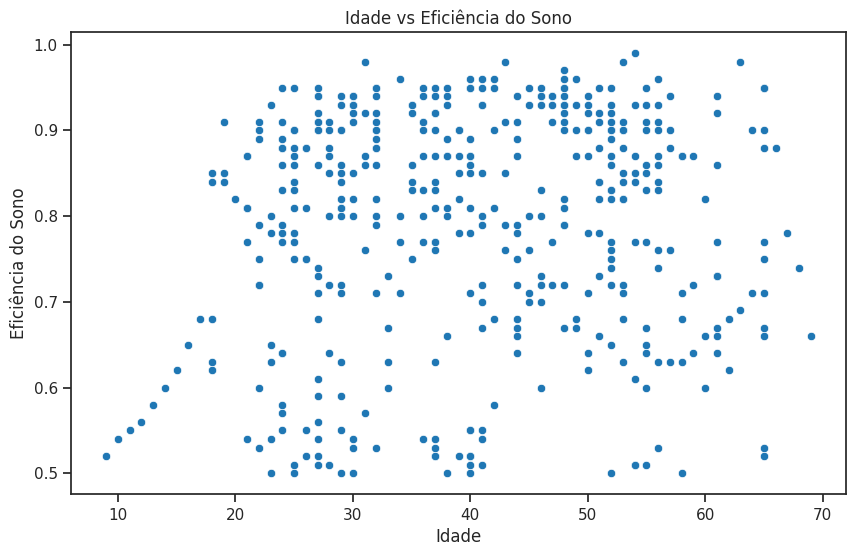

In [24]:
sleep_data = pd.read_csv('../data/raw/sleep_efficiency.csv')
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Age', y='Sleep efficiency', data=sleep_data)
plt.title('Idade vs Eficiência do Sono')
plt.xlabel('Idade')
plt.ylabel('Eficiência do Sono')
plt.show()

### A média de sono REM é diferente entre homens e mulheres?

_Hipótese: Mulheres têm uma média de sono REM maior do que homens._

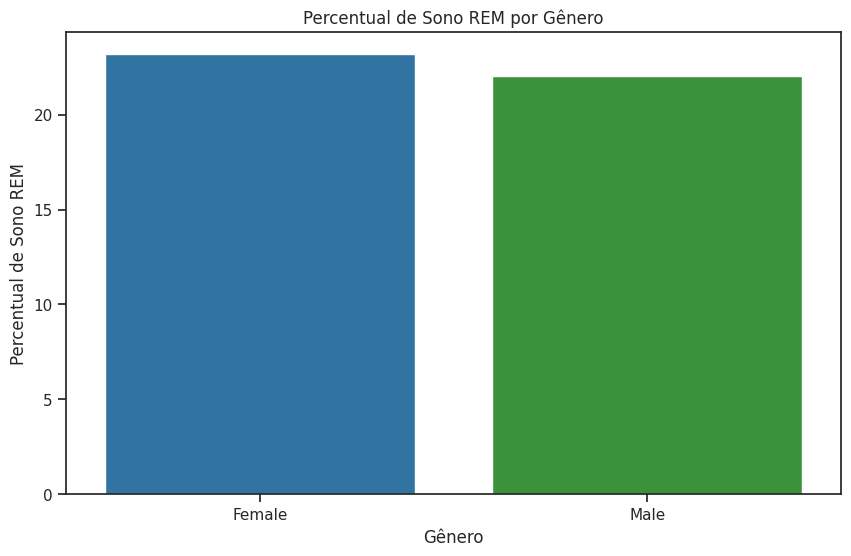

In [25]:
sleep_data = pd.read_csv('../data/raw/sleep_efficiency.csv')
plt.figure(figsize=(10, 6))

sns.barplot(x='Gender', y='REM sleep percentage', data=sleep_data, ci=None)
plt.title('Percentual de Sono REM por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Percentual de Sono REM')
plt.show()

* Ambos os gêneros têm uma faixa de sono REM bastante próxima, com uma diferença pequena.

* O gráfico sugere que a média de sono REM é superior para as mulheres.

* Os percentuais de sono REM para ambos os gêneros estão na faixa de 20 a 25%.

* A proximidade dos valores indica que o gênero pode não ser um fator determinante significativo no percentual de sono REM.

### Qual é a distribuição da duração do sono?

_Hipótese: A maioria das pessoas dorme entre 6 e 8 horas por noite._

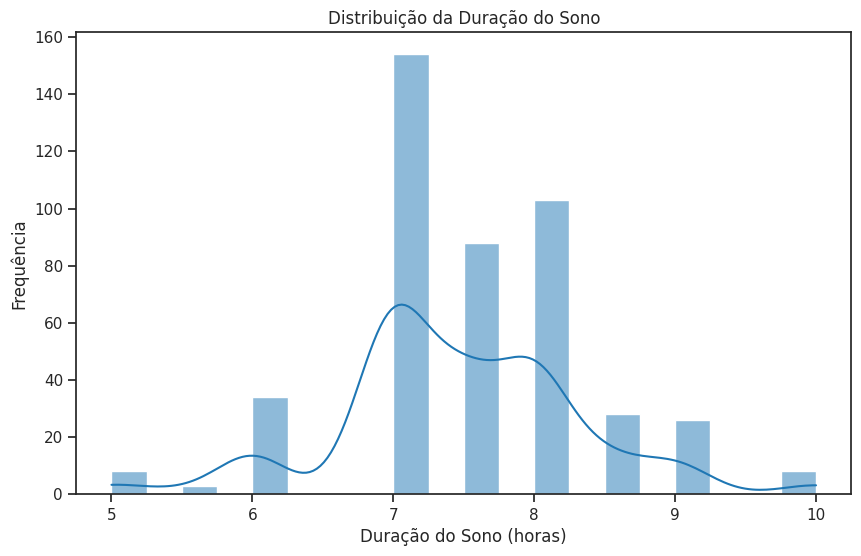

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(sleep_data['Sleep duration'], bins=20, kde=True)
plt.title('Distribuição da Duração do Sono')
plt.xlabel('Duração do Sono (horas)')
plt.ylabel('Frequência')
plt.show()

* A maioria das pessoas no conjunto de dados dorme cerca de 7 horas por noite, como evidenciado pelo pico em torno dessa duração.

* As durações do sono variam de aproximadamente 5 a 10 horas, mostrando uma distribuição relativamente ampla.

* Poucas pessoas dormem menos de 6 horas ou mais de 9 horas, como visto nas barras menores nas extremidades do gráfico.

* A distribuição é levemente assimétrica à direita, indicando que há algumas pessoas que dormem mais de 8 horas, mas são menos comuns.

### Existe uma relação entre o consumo de cafeína e a eficiência do sono?

_Hipótese: Maior consumo de cafeína está associado a menor eficiência do sono._

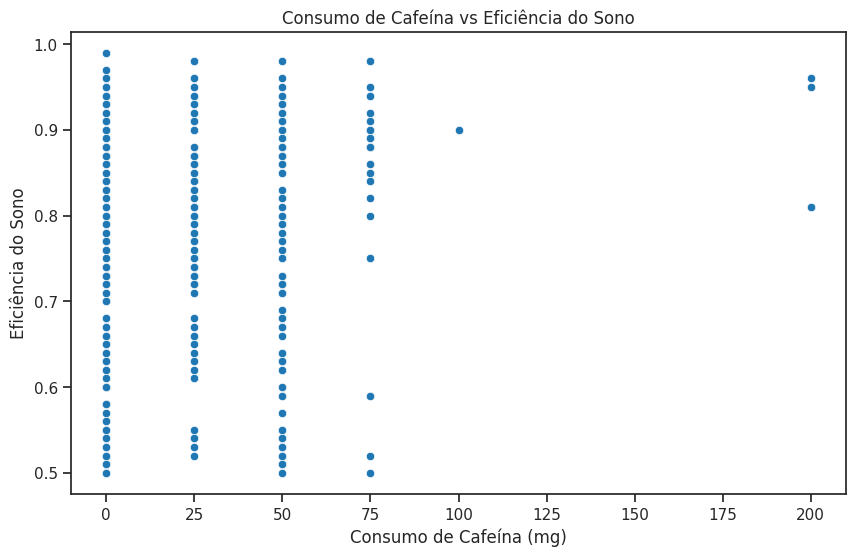

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Caffeine consumption', y='Sleep efficiency', data=sleep_data)
plt.title('Consumo de Cafeína vs Eficiência do Sono')
plt.xlabel('Consumo de Cafeína (mg)')
plt.ylabel('Eficiência do Sono')
plt.show()

* O consumo de cafeína varia amplamente de 0 a 200 mg, indicando uma grande diversidade nos hábitos de consumo de cafeína entre os participantes.

* A maioria dos participantes consome entre 0 e 50 mg de cafeína, como evidenciado pela alta densidade de pontos nessa faixa.

* Alguns participantes que consomem altas quantidades de cafeína (mais de 75 mg) ainda têm alta eficiência do sono.

* A eficiência do sono parece variar amplamente em todas as faixas de consumo de cafeína.

### Qual é a distribuição de eficiência do sono por gênero?

_Hipótese: Não há diferença significativa na eficiência do sono entre gêneros._

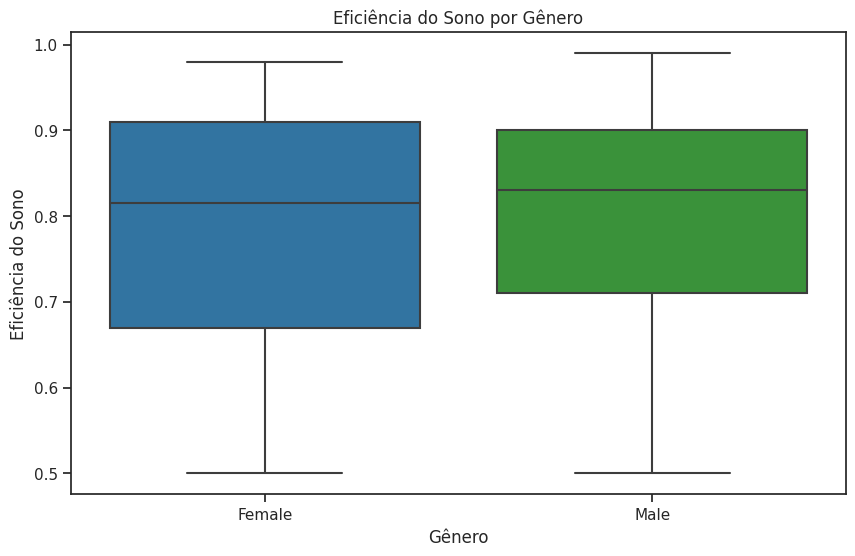

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Sleep efficiency', data=sleep_data)
plt.title('Eficiência do Sono por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Eficiência do Sono')
plt.show()

* A mediana da eficiência do sono é semelhante para ambos os gêneros, próxima a 0.8.

* A eficiência do sono tem uma distribuição ampla para ambos os gêneros, variando de 0.5 a 1.0.

* As mulheres têm uma amplitude interquartil um pouco maior que os homens, sugerindo maior variabilidade.

### Como o consumo de álcool afeta a duração do sono?

_Hipótese: Maior consumo de álcool está associado a uma menor duração do sono._

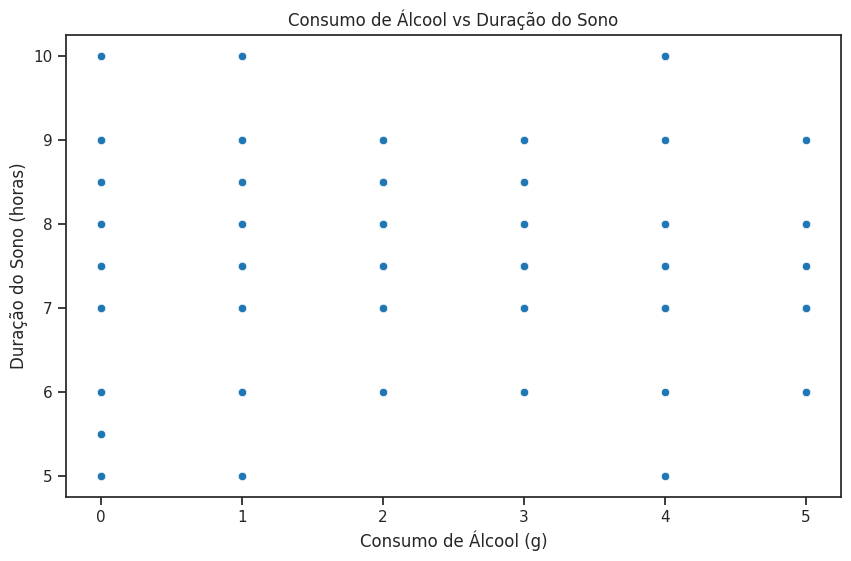

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Alcohol consumption', y='Sleep duration', data=sleep_data)
plt.title('Consumo de Álcool vs Duração do Sono')
plt.xlabel('Consumo de Álcool (g)')
plt.ylabel('Duração do Sono (horas)')
plt.show()

* O consumo de álcool varia de 0 a 5 gramas, mostrando diversidade nos hábitos de consumo.

* A duração do sono varia amplamente de 5 a 10 horas para todos os níveis de consumo de álcool.

* Há uma maior concentração de pontos em consumos baixos de álcool (0 a 2 gramas).

* Pessoas que consomem álcool podem ter tanto durações curtas quanto longas de sono, variando amplamente.

### Existe uma relação entre a frequência de exercícios e a eficiência do sono?

_Hipótese: Maior frequência de exercícios está associada a maior eficiência do sono._

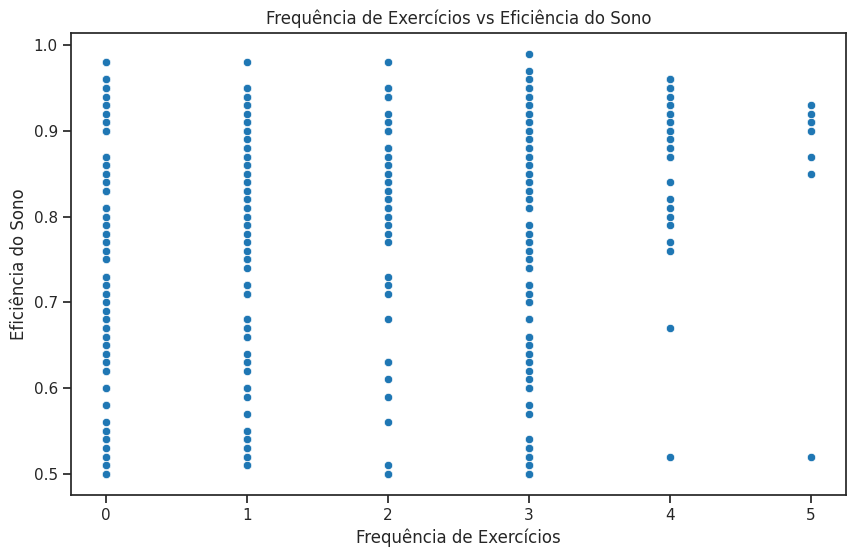

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Exercise frequency', y='Sleep efficiency', data=sleep_data)
plt.title('Frequência de Exercícios vs Eficiência do Sono')
plt.xlabel('Frequência de Exercícios')
plt.ylabel('Eficiência do Sono')
plt.show()

### Qual é a distribuição do percentual de sono leve?

_Hipótese: A maioria das pessoas tem entre 50% e 70% de sono leve._

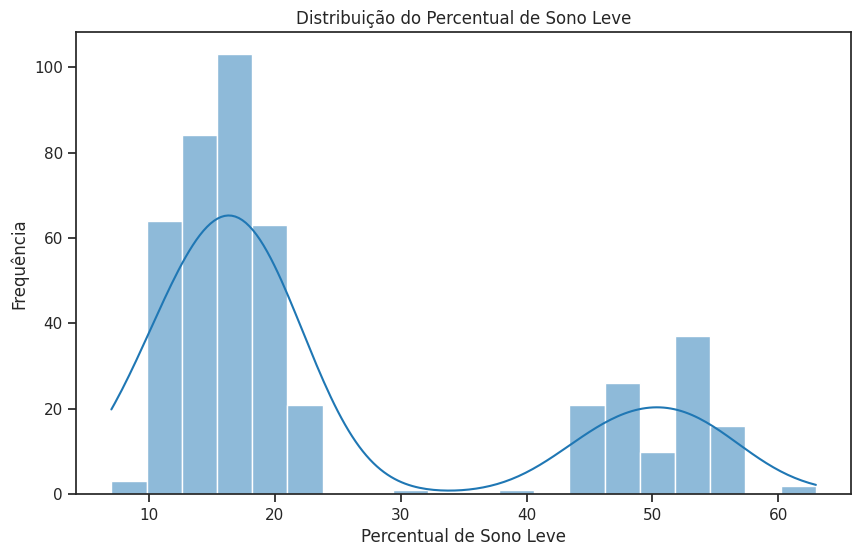

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(sleep_data['Light sleep percentage'], bins=20, kde=True)
plt.title('Distribuição do Percentual de Sono Leve')
plt.xlabel('Percentual de Sono Leve')
plt.ylabel('Frequência')
plt.show()

### Como o consumo de cafeína e o gênero afetam a eficiência do sono?

_Hipótese: Maior consumo de cafeína está associado a menor eficiência do sono e essa relação pode variar entre homens e mulheres._

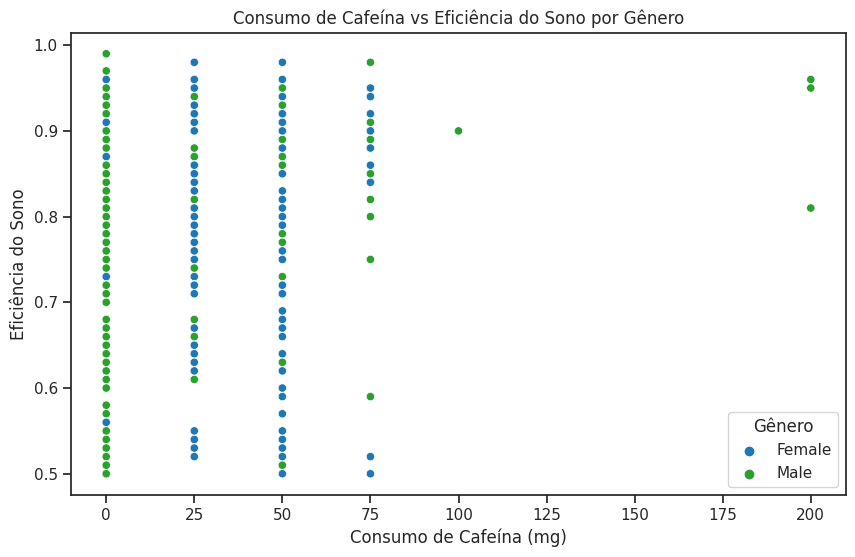

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Caffeine consumption', y='Sleep efficiency', hue='Gender', data=sleep_data)
plt.title('Consumo de Cafeína vs Eficiência do Sono por Gênero')
plt.xlabel('Consumo de Cafeína (mg)')
plt.ylabel('Eficiência do Sono')
plt.legend(title='Gênero')
plt.show()

## 4. Insights

## 5. Observações

* Com base nas informações disponíveis, identificamos que as variáveis ['Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency'] contêm valores faltantes. Além disso, constatamos que há um total de 64 linhas com dados ausentes. Para assegurar a precisão das análises subsequentes, optamos por desconsiderar essas linhas com valores faltantes. Essa abordagem garantirá uma avaliação mais consistente e confiável dos dados remanescentes."

* Não foram tiradas conclusões sobre os dados e visualizações. Para uma análise mais detalhada e conclusões precisas, é melhor consultar um especialista. Eles podem oferecer insights adicionais e confirmar as interpretações dos dados, garantindo uma compreensão mais completa e precisa dos resultados.